# Model 2 - KNN Classifier with Matrix Profiling

In this notebook, we will make an attempt to improve the performance of our model by using Matrix Profiling. Matrix profiling is a method used to identify patterns in time series data by calculating the similarity of chunks in the series, by calculating the distances between them. The whole process of calculating the Matrix profile can be found out [here](https://stumpy.readthedocs.io/en/latest/Tutorial_The_Matrix_Profile.html).

We will be using a python library called Stumpy which allows us to do this in a computationally efficient manner.

Let's quickly preprocess our data as in the previous model.

In [1]:
import pandas as pd
from my_utils import rename_cols
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df_normal = pd.read_csv('ptbdb_normal.csv')
df_abnormal = pd.read_csv('ptbdb_abnormal.csv')
df_train = pd.read_csv('mitbih_train.csv')
df_test = pd.read_csv('mitbih_test.csv')

rename_cols(df_normal)
rename_cols(df_abnormal)
rename_cols(df_train) 
rename_cols(df_test)

In [3]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Matrix Profiling

Let's start by calculating the matrix profile for all our datasets. We remove the target from the DataFrames and assign them as training and test data.

In [4]:
X_train = df_train.drop(columns = 187)
y_train = df_train[187]
X_test = df_test.drop(columns = 187)
y_test = df_test[187]

df_normal_wo_target = df_normal.drop(columns = 187)
df_abnormal_wo_target = df_abnormal.drop(columns = 187)

To create a matrix profile we have to choose a suitable subsequence length for the series. More details about the subsequence length can be found from the link at the top of this notebook.

Our Data was recorded at 125Hz and contains about 1.5 seconds of data. By taking a look at a sample plot of the data, we can adequately choose a length that could capture patterns within our data. 

In [5]:
from my_utils import plot_series

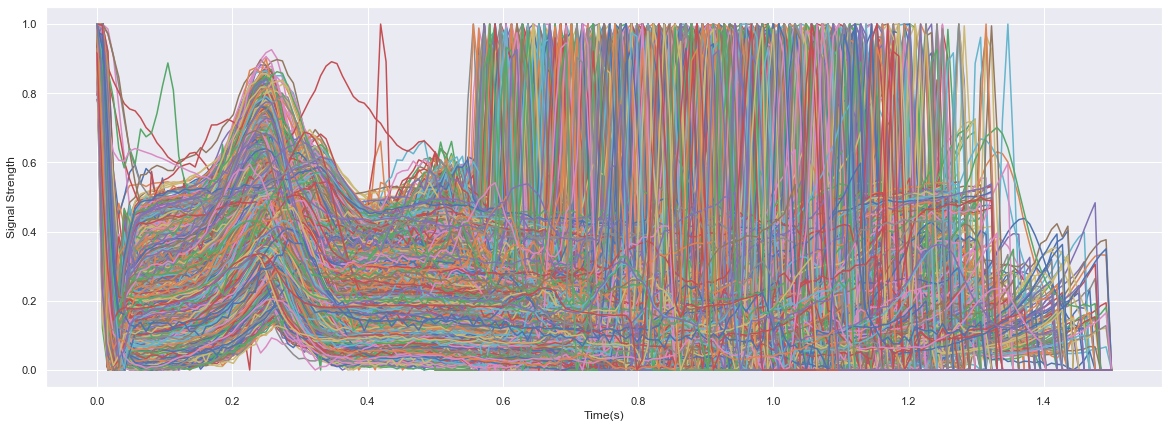

In [6]:
plot_series(df_normal_wo_target)

From the above plot we can see that a subsequence length (m) of around 0.2 seconds may be able to accurately capture any important pattern within the data. 

This translates to around 12 points (columns) of data in our time series. Let's set this value of m and calculate the matrix profile for all the datasets. 

**Note:** This process can take a long time to run. You could instead load the data from the pickled file by running the cells below the stump process.

In [7]:
m = 12

*The stumpify function uses the stumpy module to perform the operation on the entire DataFrame. It is a custom function and the code for it can be found in the my_utils.py file.*

In [8]:
from my_utils import stumpify

In [9]:
X_train_stumped = stumpify(X_train, m)
X_test_stumped = stumpify(X_test, m)

df_normal_stumped = stumpify(df_normal_wo_target, m)
df_abnormal_stumped = stumpify(df_abnormal_wo_target, m)

In [10]:
X_train_stumped.head()

,0,1,2,3,4,5,6,7,8,9,...,166,167,168,169,170,171,172,173,174,175
0,0.252208,0.360512,0.677165,1.469103,1.423930,1.081399,1.919320,2.388468,1.984005,2.113760,...,4.898961,4.898961,4.898961,4.898961,4.898961,4.898961,4.898961,4.898961,4.898961,4.898961
1,0.215044,0.328131,0.866709,2.548000,2.313562,1.305744,0.963826,0.825275,0.777359,0.621833,...,4.898973,4.898973,4.898973,4.898973,4.898973,4.898973,4.898973,4.898973,4.898973,4.898973
2,0.364839,0.500857,0.601667,0.728914,1.904357,1.149912,0.792111,0.789751,1.311359,1.322616,...,4.898966,4.898966,4.898966,4.898966,4.898966,4.898966,4.898966,4.898966,4.898966,4.898966
3,0.479117,0.428764,0.342907,0.357040,0.564082,1.057788,1.836249,1.268806,1.661309,1.682239,...,4.898960,4.898960,4.898960,4.898960,4.898960,4.898960,4.898960,4.898960,4.898960,4.898960
4,0.175252,0.230823,0.339272,0.359412,0.324052,0.320136,0.343113,0.468195,0.648533,1.701497,...,4.898947,4.898947,4.898947,4.898947,4.898947,4.898947,4.898947,4.898947,4.898947,4.898947


The cells below allow you to load the data from the above cell, without having to wait. Run these cells to load the data from the pickled file.

In [12]:
import pickle

In [13]:
with open('data.pickle', 'wb') as f:
    pickle.dump([X_train_stumped, X_test_stumped, df_normal_stumped, df_abnormal_stumped], f, pickle.HIGHEST_PROTOCOL)

In [14]:
# Run this to load the dataframes
with open('data.pickle', 'rb') as f:
    X_train_stumped, X_test_stumped, df_normal_stumped, df_abnormal_stumped = pickle.load(f)

## Principal Component Analysis

Running Stump on the DataFrame reduced the number of columns a little bit (186 to 176), however, the dimensionality is still very high for a KNN Classifier to run efficiently. We will now create a plot of the number of features vs the explained variance ratio just like in the previous notebook.

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(176, random_state=42)
pca.fit(X_train_stumped)

var_ratio = pca.explained_variance_ratio_.cumsum()

print('Percentage Explained:', pca.explained_variance_ratio_.sum())

Percentage Explained: 1.0000000000000002


In [17]:
from my_utils import explained_variance_ratio_plot

90% Information explained at 23 features.


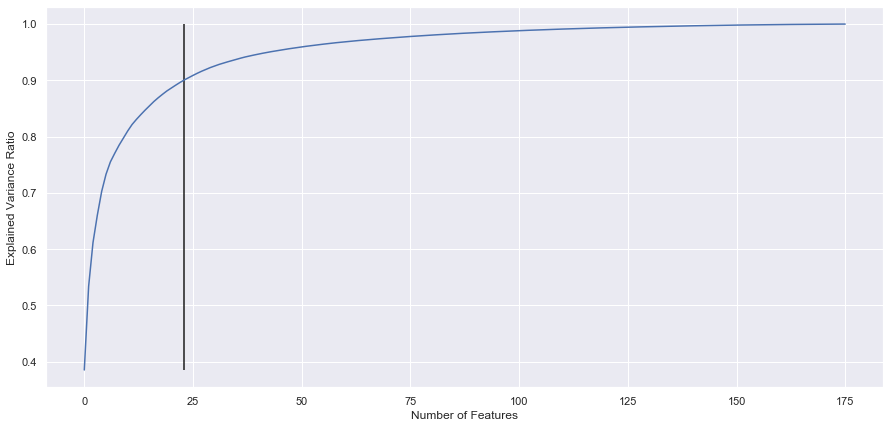

In [18]:
explained_variance_ratio_plot(var_ratio)

90% of the information in the dataset can be explained using 23 features. Let's use around 25 features. This is a substantial reduction from 176.

In [19]:
pca = PCA(25, random_state=42)
pca.fit(X_train_stumped)

var_ratio = pca.explained_variance_ratio_.cumsum()

print('Percentage Explained:', pca.explained_variance_ratio_.sum())

Percentage Explained: 0.9048230587456078


In [20]:
transformed_train = pca.transform(X_train_stumped)

print(transformed_train.shape)

(87553, 25)


In [21]:
transformed_test = pca.transform(X_test_stumped)

print(transformed_test.shape)

(21891, 25)


In [22]:
pd.DataFrame(transformed_train).head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,9.673181,1.646704,-5.267853,1.647564,-4.871741,-0.724759,2.348256,1.335231,1.453457,2.155954,...,3.335602,-1.316077,0.401830,1.172493,1.733219,0.154659,-1.608563,-0.973964,-0.180856,-0.316752
1,-8.605220,0.516180,3.166424,-2.255630,-1.341915,-0.805245,-1.925469,1.696317,0.700007,-1.699210,...,0.520918,-1.241441,1.992430,-0.393204,0.034870,-0.715767,-0.727374,0.252178,0.182459,0.334606
2,-7.243490,-1.869398,5.369768,-2.290325,-2.189737,-1.250694,-1.422406,0.306769,-1.530256,-0.846471,...,-0.299945,1.567855,-0.424189,-0.770551,-0.688532,0.398199,-0.180822,0.817978,-0.305119,0.244848
3,11.566181,2.498233,-2.381500,-1.068026,-6.591798,0.252278,2.344893,0.263736,0.665763,1.952865,...,1.803049,0.417372,1.464617,0.183434,0.720722,1.515143,1.321513,-0.739075,-1.936974,-0.335458
4,5.268068,-6.792186,-5.020318,1.410453,2.985387,-2.539300,1.181847,1.299058,0.301309,1.303409,...,1.552415,-0.708641,-0.257722,-1.754614,0.294418,0.032578,0.116001,-1.539930,-0.492006,0.880681


The DataFrames now only have 25 features in them, compared to 176 previously. This massively reduces the complexity of running a KNearest Neighbors Classifier on the dataset. 



## K Nearest Neighbors Classifier

Let's now set up and run the classifier. The model is trained on the training set, and predictions are made for both the training and test sets to check if there is any overfitting occuring. A cross validated score is also produced.

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3, n_jobs = -1)

In [24]:
knn.fit(transformed_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
cross_val_score(knn, transformed_train, y_train, cv = 5, n_jobs = -1, scoring = 'f1_weighted').mean()

0.9432142793334289

It does pretty well but not as well as the previous model. Lets go further and try to make predictions. The weighted f1 score was used for cross validation to account for the imbalance of classes within the dataset. Most of the dataset consists of normal hearbeats, as compared to the abnormal ones.

Now lets try and obtain the metrics on the complete train and test sets. We are going to check the Accuracy Score and F1 Score for both datasets.

In [27]:
train_preds = knn.predict(transformed_train)
test_preds = knn.predict(transformed_test)

In [28]:
from my_utils import print_metric_results

In [29]:
print_metric_results(y_train , y_test, train_preds, test_preds)

Train Accuracy: 0.9681335876554773
Train F1 Score: 0.9670645426289005
Test Accuracy: 0.9462336119866612
Test F1 Score: 0.9438979011619764


In [30]:
from sklearn.metrics import confusion_matrix
from my_utils import plot_confusion_matrix

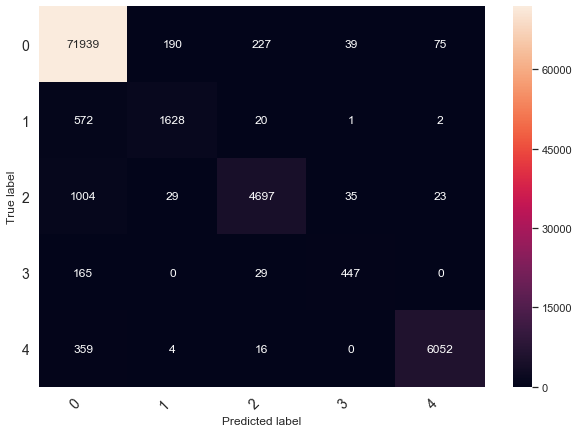

In [31]:
plot_confusion_matrix(confusion_matrix(y_train, train_preds), np.arange(5))

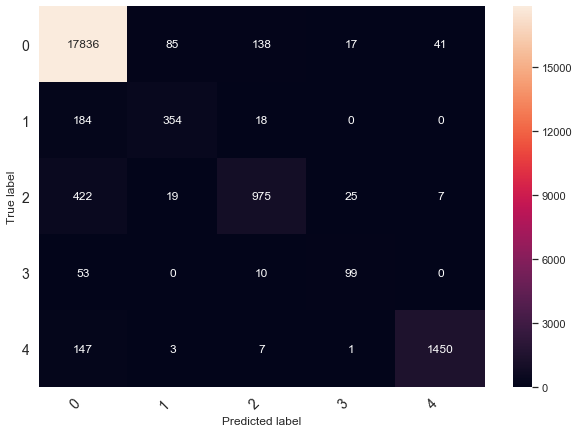

In [32]:
plot_confusion_matrix(confusion_matrix(y_test, test_preds), np.arange(5))

Again, this model does not perform as well as the previous model. However, it would be useful to try if this model is able to classify the df_normal and df_abnormal datasets better than the previous model. Let's now try to do just that.

In [33]:
df_abnormal_transformed = pca.transform(df_abnormal_stumped)
df_normal_transformed = pca.transform(df_normal_stumped)

In [34]:
abnormal_preds = knn.predict(df_abnormal_transformed)
normal_preds = knn.predict(df_normal_transformed)

In [35]:
pd.Series(abnormal_preds).value_counts()

0.0    9875
2.0     347
1.0     175
4.0      95
3.0      13
dtype: int64

In [36]:
pd.Series(normal_preds).value_counts()

0.0    3871
2.0     144
1.0      22
4.0       7
3.0       1
dtype: int64

The model does worse here again compared to the previous. It may not be worth using this model to create the binary model, especially since it is also computationally expensive to calculate the Matrix Profile. Let's now create a binary model using Model 1.